In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import pickle 
import gzip
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_mnist(filename, type, n_datapoints):
    # MNIST Images have 28*28 pixels dimension
    image_size = 28
    f = gzip.open(filename)
    
    if(type == 'image'):
        f.read(16)    # Skip Non-Image information
        buf = f.read(n_datapoints * image_size * image_size)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(n_datapoints, image_size, image_size, 1)
    elif(type == 'label'):
        f.read(8) # Skip Inessential information
        buf = f.read(n_datapoints)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        data = data.reshape(n_datapoints, 1)
    return data

Index:  57319
Training Set: 
Label: [2]


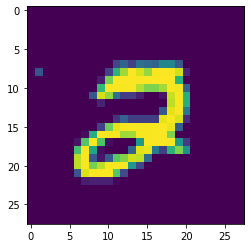

In [ ]:
index = random.randint(0, train_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y[index])
img = np.asarray(X[index]).squeeze()
plt.imshow(img)
plt.show()

In [ ]:
train_size = 60000
test_size = 10000
dirpath = '/content/drive/MyDrive/Projects/Digit Recognition/'
#/content/drive/MyDrive/Projects/Digit Recognition/train-images-idx3-ubyte.gz
X = load_mnist(dirpath + 'train-images-idx3-ubyte.gz', 'image', train_size)
y = load_mnist(dirpath + 'train-labels-idx1-ubyte.gz', 'label', train_size)
X_test = load_mnist(dirpath + 't10k-images-idx3-ubyte.gz', 'image', test_size)
y_test = load_mnist(dirpath + 't10k-labels-idx1-ubyte.gz', 'label', test_size)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X[:(train_size//10)], y[:(train_size//10)], test_size=0.25, random_state=28)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4500, 28, 28, 1) (1500, 28, 28, 1) (4500, 1) (1500, 1)



# KNN Classifier , k value testing


Begin KNN with k= 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9506666666666667
Begin KNN with k= 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9266666666666666
Begin KNN with k= 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.938
Begin KNN with k= 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9386666666666666
Begin KNN with k= 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9393333333333334
Begin KNN with k= 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.94
Begin KNN with k= 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9366666666666666
Begin KNN with k= 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.936


Text(0.5, 1.0, 'Testing for best K nearest neighbours')

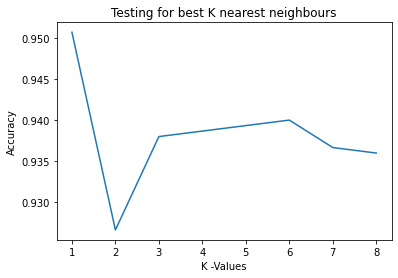

In [ ]:
score = []

for k in range(1, 9):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)
  pred = classifier.predict(X_valid.reshape(X_valid.shape[0], 28*28))
  accuracy = accuracy_score(y_valid, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)

plt.plot(range(1,9),score)
plt.xlabel('K -Values')
plt.ylabel('Accuracy')
plt.title('Testing for best K nearest neighbours')

In [ ]:
%%time
print('Training the Model')
classifier = KNeighborsClassifier(n_neighbors=6)
classifier = classifier.fit(X.reshape(X.shape[0], 28*28), y)


Training the Model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 16 s, sys: 105 ms, total: 16.1 s
Wall time: 16.1 s


In [ ]:
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))
print(accuracy_score(y_test, y_pred))


0.9677


In [ ]:
import joblib

joblib.dump(classifier, 'knn_model.gzip', compress=('gzip',3))

['knn_model.gzip']